In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import itertools

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
import imageio,io

from warnings import simplefilter # ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

%matplotlib inline

data_frame = pd.read_csv('data.csv')
data_frame = data_frame.drop("Unnamed: 0", axis="columns")
data_frame.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [3]:
data_frame.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [4]:
print("The dataset contains following number of records for each of columns"+str(data_frame.count()))
#Missing data does not appear.

The dataset contains following number of records for each of columnsacousticness        2017
danceability        2017
duration_ms         2017
energy              2017
instrumentalness    2017
key                 2017
liveness            2017
loudness            2017
mode                2017
speechiness         2017
tempo               2017
time_signature      2017
valence             2017
target              2017
song_title          2017
artist              2017
dtype: int64


In [3]:
#Check the null value for the string variable
print('song_title:' ,data_frame['song_title'].isnull().sum())
print('artist:' ,data_frame['artist'].isnull().sum())

song_title: 0
artist: 0


In [4]:
#Check how many of duplicate values in song_title & artist features

def DuplicatedFunction(data,column):
    result = data[column].duplicated().sum()
    return result

print('Duplicate Values:' ,DuplicatedFunction(data_frame,'song_title'))
print('Duplicate Values:' ,DuplicatedFunction(data_frame,'artist'))

Duplicate Values: 61
Duplicate Values: 674


In [36]:
print(data_frame[['mode','target']].groupby(['mode']).mean().sort_values(by = 'target', ascending = False))

        target
mode          
0     0.551151
1     0.476923


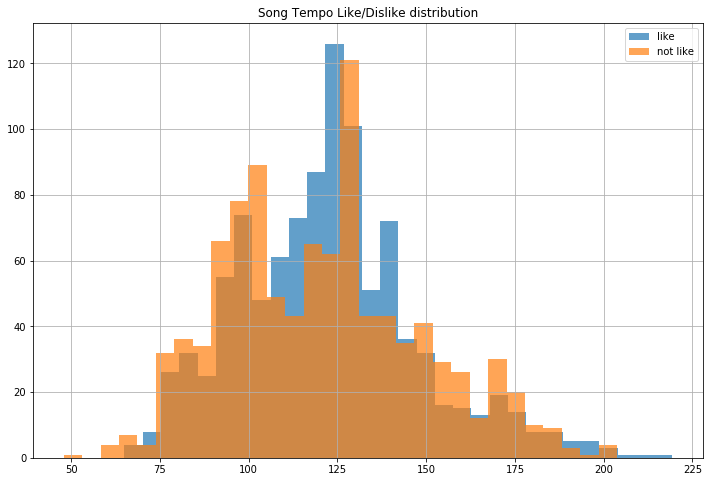

In [5]:
df=data_frame
pos_tempo            = df[df['target']== 1]['tempo']
neg_tempo            = df[df['target']== 0]['tempo']
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like/Dislike distribution')
pos_tempo.hist(alpha=0.7,bins=30,label='like')
neg_tempo.hist(alpha=0.7,bins=30,label='not like')
plt.legend()
plt.show()

Text(0.5, 0, 'instrumentalness')

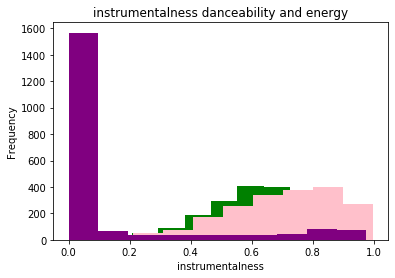

In [9]:
data_frame['danceability'].plot.hist(title='danceability histograms', color='green')
plt.xlabel('danceability')

data_frame['energy'].plot.hist(title='energy histograms', color='pink')
plt.xlabel('energy')

data_frame['instrumentalness'].plot.hist(title='instrumentalness danceability and energy', color='purple')
plt.xlabel('instrumentalness')

#danceability histogram rengi yeşil,energy histogram rengi pembe, instrumentalness histogram ise mor renkte gösterilmektedir.
#???

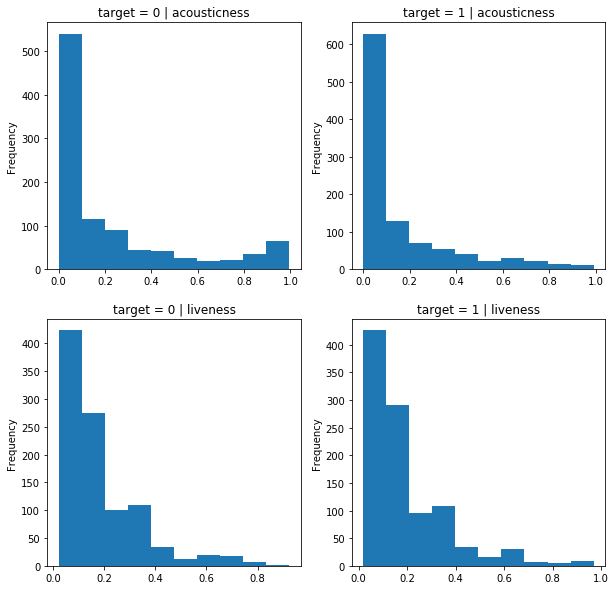

In [9]:
#acousticness and liveness
f,ax = plt.subplots(2,2,figsize = (10,10))
data_frame[data_frame['target'] == 0].acousticness.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | acousticness')
data_frame[data_frame['target'] == 1].acousticness.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | acousticness')

data_frame[data_frame['target'] == 0].liveness.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | liveness')
data_frame[data_frame['target'] == 1].liveness.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target = 1 | liveness')
plt.show()

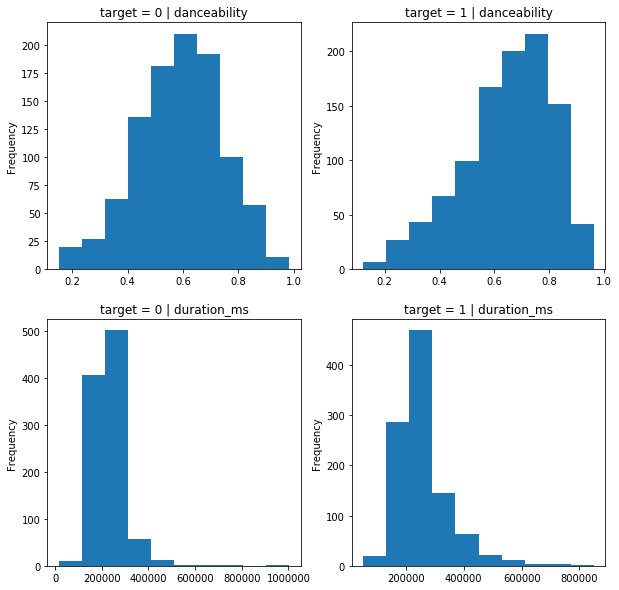

In [17]:
f,ax = plt.subplots(2,2,figsize = (10,10))
data_frame[data_frame['target'] == 0].danceability.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | danceability')
data_frame[data_frame['target'] == 1].danceability.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | danceability')


data_frame[data_frame['target'] == 0].duration_ms.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | duration_ms')
data_frame[data_frame['target'] == 1].duration_ms.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target = 1 | duration_ms')
plt.show()

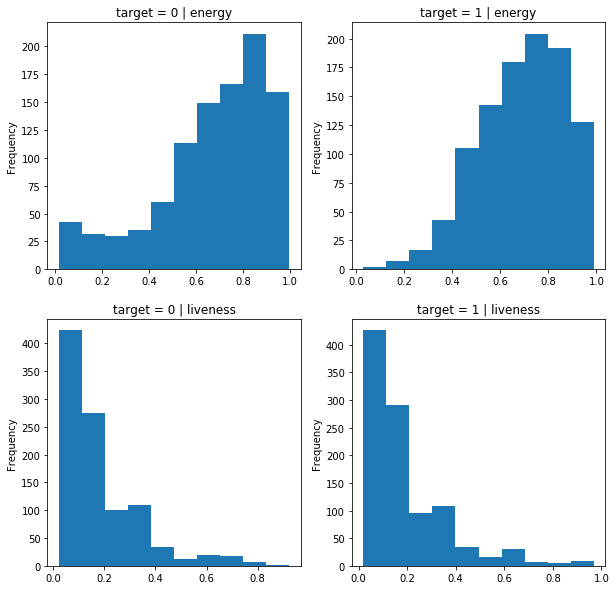

In [18]:
f,ax = plt.subplots(2,2,figsize = (10,10))
data_frame[data_frame['target'] == 0].energy.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | energy')
data_frame[data_frame['target'] == 1].energy.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | energy')


data_frame[data_frame['target'] == 0].liveness.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | liveness')
data_frame[data_frame['target'] == 1].liveness.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target = 1 | liveness')
plt.show()

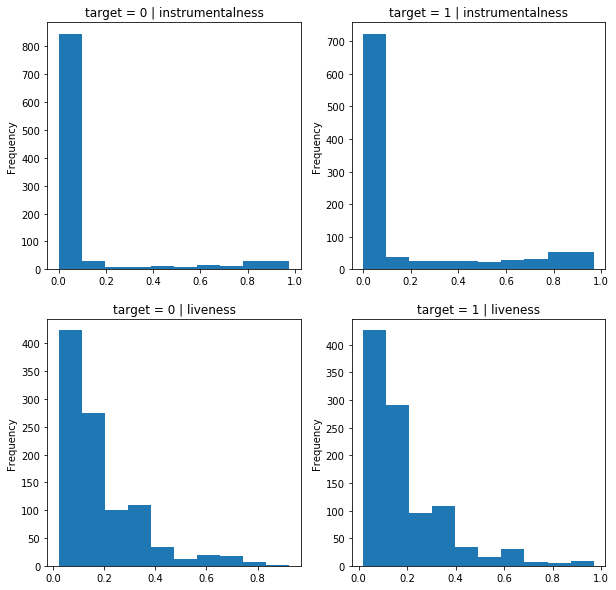

In [19]:
f,ax = plt.subplots(2,2,figsize = (10,10))
data_frame[data_frame['target'] == 0].instrumentalness.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | instrumentalness')
data_frame[data_frame['target'] == 1].instrumentalness.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | instrumentalness')


data_frame[data_frame['target'] == 0].liveness.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | liveness')
data_frame[data_frame['target'] == 1].liveness.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target = 1 | liveness')
plt.show()

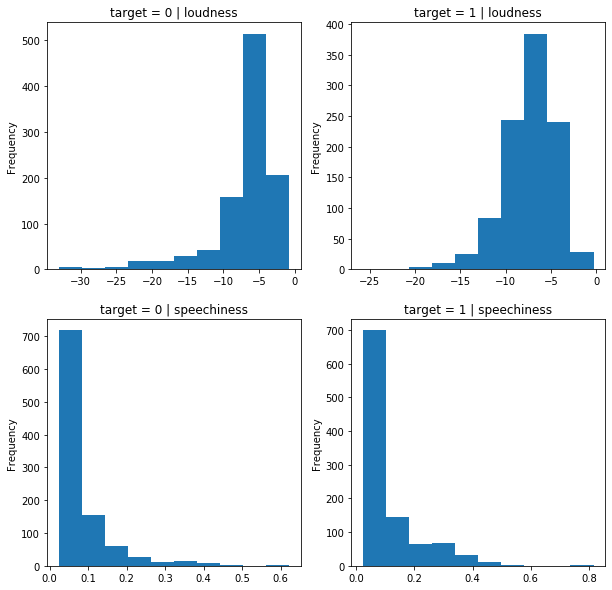

In [20]:
f,ax = plt.subplots(2,2,figsize = (10,10))
data_frame[data_frame['target'] == 0].loudness.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | loudness')
data_frame[data_frame['target'] == 1].loudness.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | loudness')


data_frame[data_frame['target'] == 0].speechiness.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | speechiness')
data_frame[data_frame['target'] == 1].speechiness.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target = 1 | speechiness')
plt.show()

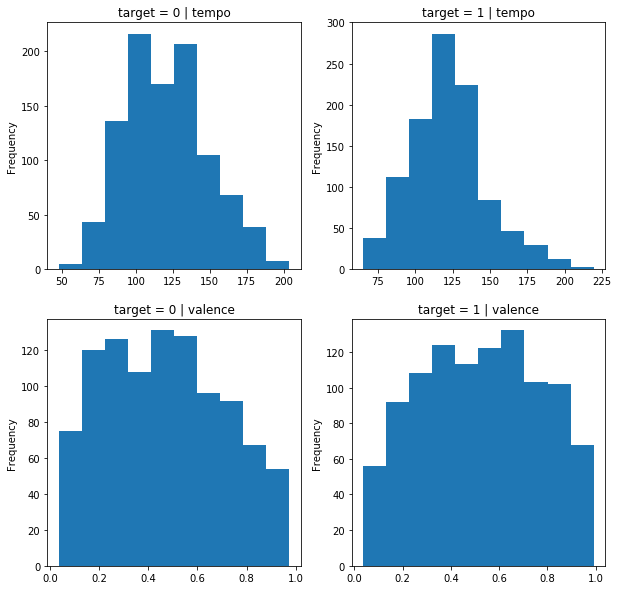

In [21]:
f,ax = plt.subplots(2,2,figsize = (10,10))
data_frame[data_frame['target'] == 0].tempo.plot.hist(bins = 10, ax = ax[0,0])
ax[0,0].set_title('target = 0 | tempo')
data_frame[data_frame['target'] == 1].tempo.plot.hist(bins = 10, ax = ax[0,1])
ax[0,1].set_title('target = 1 | tempo')


data_frame[data_frame['target'] == 0].valence.plot.hist(bins = 10, ax = ax[1,0])
ax[1,0].set_title('target = 0 | valence')
data_frame[data_frame['target'] == 1].valence.plot.hist(bins = 10, ax = ax[1,1])
ax[1,1].set_title('target = 1 | valence')
plt.show()

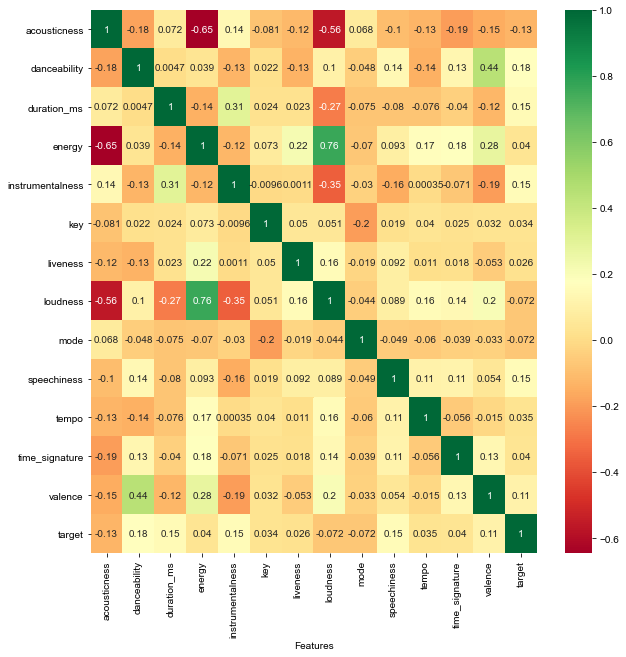

In [41]:
#we will create a heat map to find out the correalation between the features & class labels.
f,ax = plt.subplots(figsize = (10,10)) #the size of the heat map
sb.heatmap(data_frame.corr(), annot = True, fmt = '.2g', cmap = 'RdYlGn', ax= ax) #annot: values, fmt: decimal points of values
sb.set(font_scale = 0.75) #the font size of the value in the heat map
plt.xlabel('Features')
plt.show()

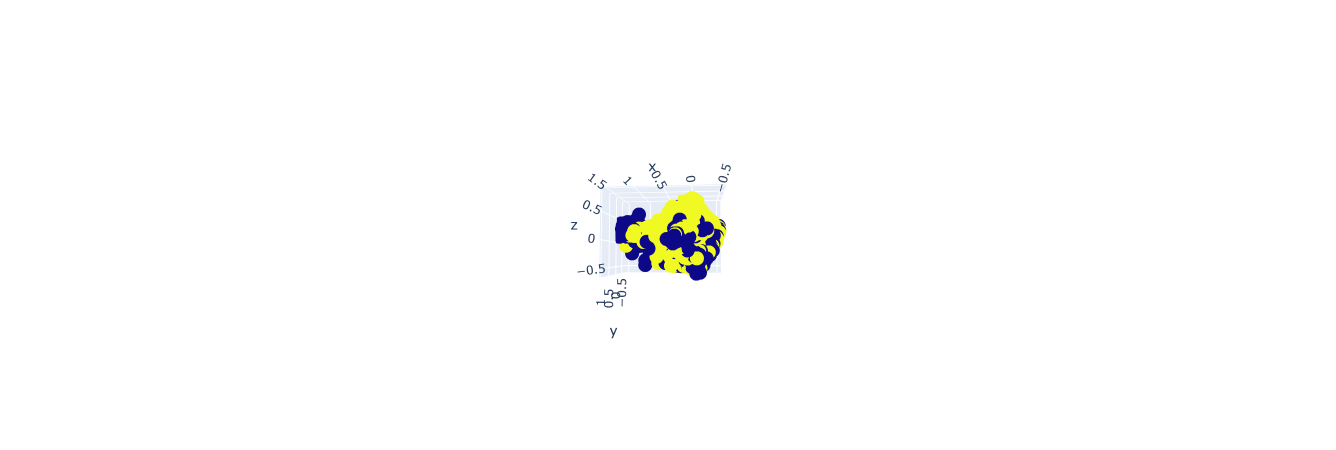

In [15]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = data_frame["artist"] + " - " + data_frame["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = data_frame[chosen].values
y = data_frame["target"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig)

#We can see clearly in here which are liked or not liked. Yellows are target = 1 means liked songs.  
#for 3D visualization there must be some conda installment

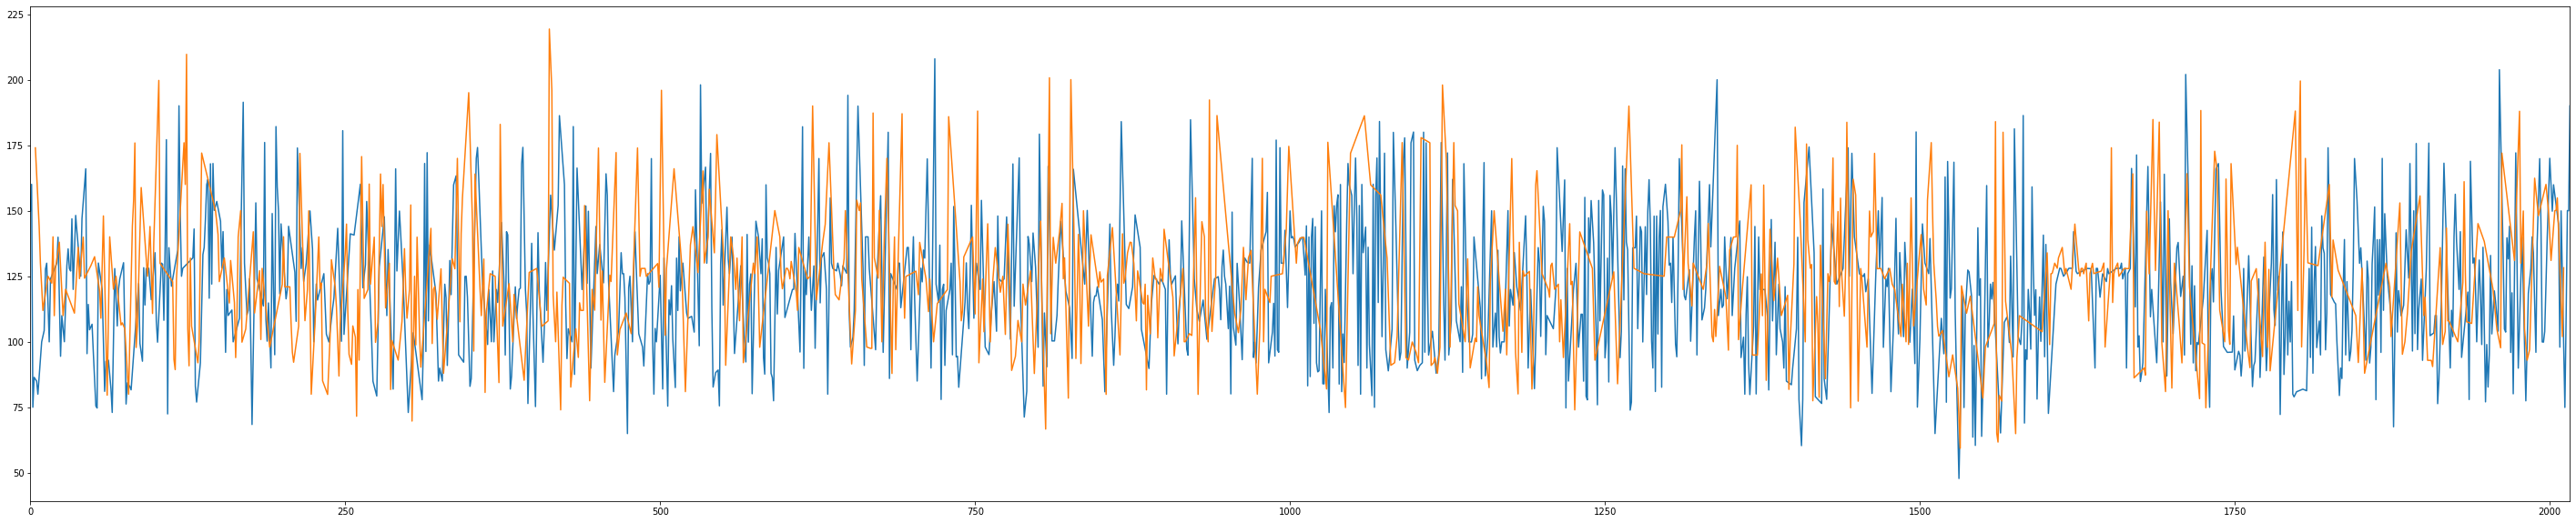

In [7]:
#Count number of songs depends on tempo and mode (Positive & Negative)

positiveTempo = data_frame[data_frame['mode'] == 1]['tempo']
negativeTempo = data_frame[data_frame['mode'] == 0]['tempo']
plt.figure(figsize=(50,10))
positiveTempo.plot()
negativeTempo.plot()

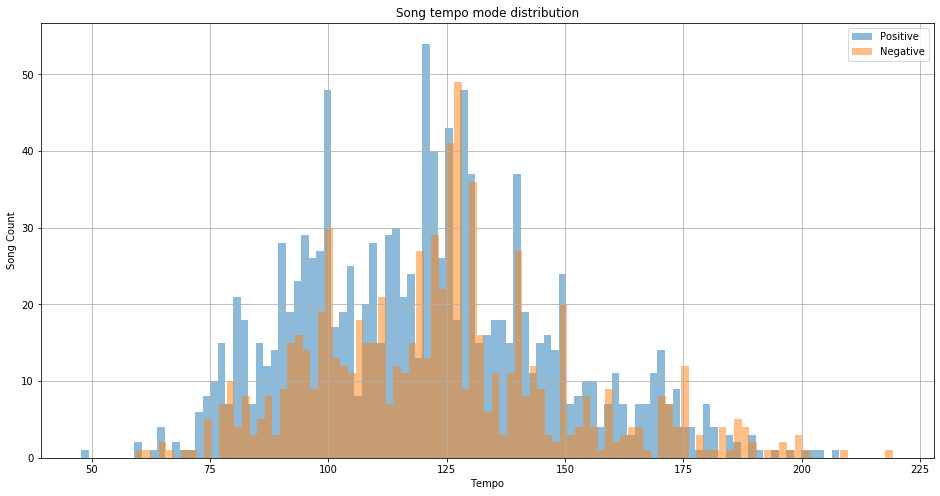

In [8]:
plt.figure(figsize=(16,8))
plt.title('Song tempo mode distribution')
plt.xlabel('Tempo')
plt.ylabel('Song Count')
positiveTempo.hist(bins=100, alpha=.5, label='Positive')
negativeTempo.hist(bins=100, alpha=.5, label='Negative')
plt.legend()

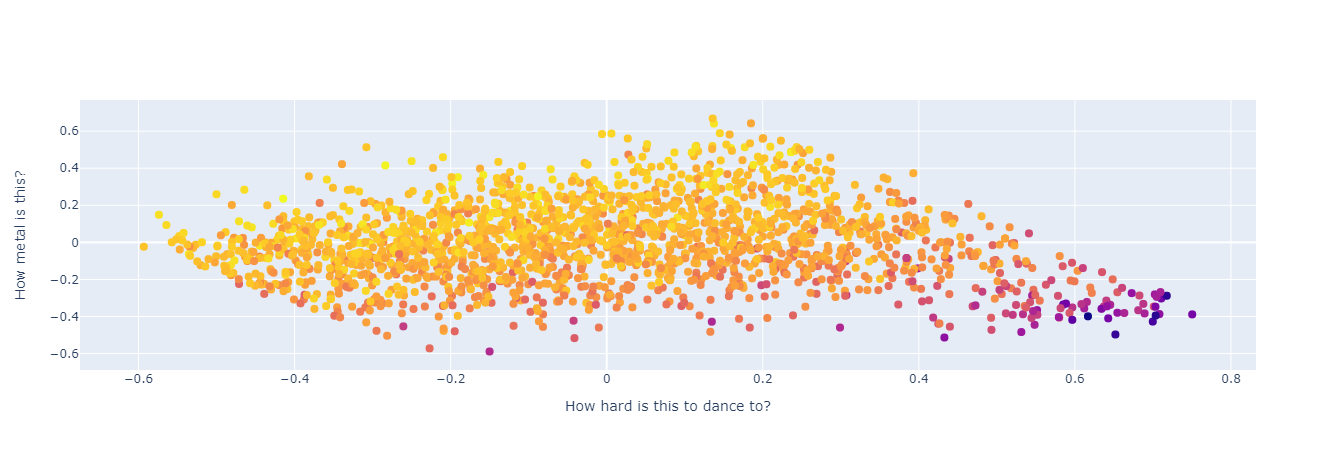

In [11]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

chosen = ["energy", "liveness", "tempo", "valence"]
text1 = data_frame["artist"] + " - " + data_frame["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = data_frame[chosen].values
y = data_frame["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size":8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig)

In [66]:
#Seperate the data

train, test = train_test_split(data_frame, test_size = 0.3)
print("Training samples:{}; Test samples{}". format(len(train), len(test)))

Training samples:1411; Test samples606


In [67]:
#We build a simple decision tree classifier based on a set of features

c = tree.DecisionTreeClassifier(min_samples_leaf = 50, 
                                random_state =10)

features = ["valence", "energy", "danceability", "speechiness", "acousticness", "instrumentalness", "loudness","duration_ms","liveness","tempo","time_signature","mode","key"]

X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

dt = c.fit(X_train, y_train)



In [73]:
#Run prediction on test data
y_prediction = c.predict(X_test)

score = accuracy_score(y_test, y_prediction)*100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}". format(rounded_score))

Decision Tree Classifier Accuracy: 69.8


In [75]:
y_tpre = c.predict(X_train)
score = accuracy_score(y_train, y_tpre)*100
rounded_score = round(score, 1)
print("Decision Tree Classifier Accuracy: {}". format(rounded_score))

Decision Tree Classifier Accuracy: 76.1


In [76]:
#
hidden_neuron_nums = list(range(15,100))
#[2,3,4,5,6...9, 10, 20, 30, ... 90, 100, 125, 150, 175]
total_performance_records = []
for hn in hidden_neuron_nums:
    c_ = tree.DecisionTreeClassifier(min_samples_leaf=hn, random_state=10)
    perf_records_ = []
    for i in range(20):
         c_.fit(X_train, y_train)
         tst_p_ = c_.predict(X_test)
         performance = np.sum(tst_p_ == y_test) / float(tst_p_.size)
         perf_records_.append(performance)
    total_performance_records.append(np.mean(perf_records_))
    print ("Evaluate hidden layer {} done, accuracy {:.3f}".format(
        hn, total_performance_records[-1]))

Evaluate hidden layer 15 done, accuracy 0.703
Evaluate hidden layer 16 done, accuracy 0.719
Evaluate hidden layer 17 done, accuracy 0.733
Evaluate hidden layer 18 done, accuracy 0.736
Evaluate hidden layer 19 done, accuracy 0.743
Evaluate hidden layer 20 done, accuracy 0.739
Evaluate hidden layer 21 done, accuracy 0.739
Evaluate hidden layer 22 done, accuracy 0.744
Evaluate hidden layer 23 done, accuracy 0.744
Evaluate hidden layer 24 done, accuracy 0.741
Evaluate hidden layer 25 done, accuracy 0.743
Evaluate hidden layer 26 done, accuracy 0.723
Evaluate hidden layer 27 done, accuracy 0.723
Evaluate hidden layer 28 done, accuracy 0.733
Evaluate hidden layer 29 done, accuracy 0.733
Evaluate hidden layer 30 done, accuracy 0.733
Evaluate hidden layer 31 done, accuracy 0.733
Evaluate hidden layer 32 done, accuracy 0.733
Evaluate hidden layer 33 done, accuracy 0.718
Evaluate hidden layer 34 done, accuracy 0.734
Evaluate hidden layer 35 done, accuracy 0.734
Evaluate hidden layer 36 done, acc

In [77]:
#Use random forest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 120)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [80]:
#and random forest model

forest_y_pred = clf.predict(X_test)
score = accuracy_score(y_test, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 120) Accuracy: {}%".format(rounded_score))

Random Forest (n_est: 100) Accuracy: 77.6%
